In [1]:
# 在Python解释器中顺利执行如下命令
import paddle

paddle.utils.run_check()

# 如果命令行出现以下提示，说明PaddlePaddle安装成功
# PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
print(paddle.__version__)


Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
2.5.2


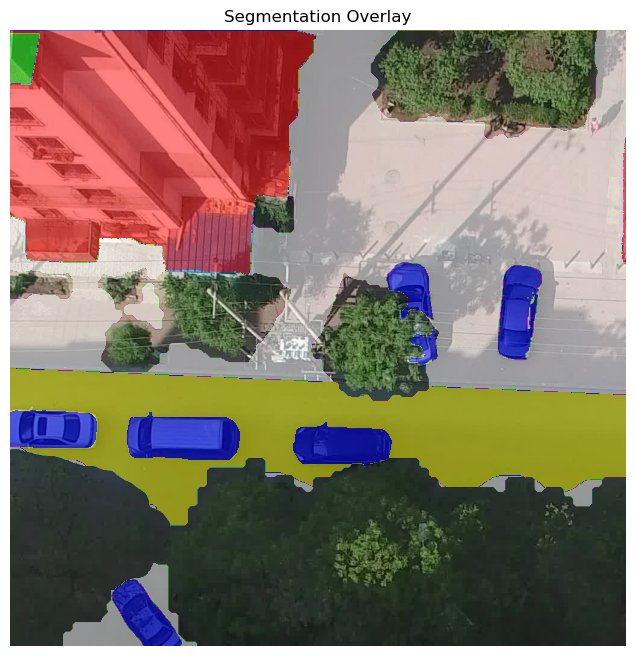

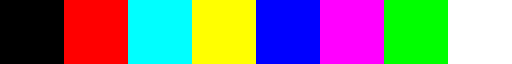

In [6]:
import os
from skimage import io
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.colors import ListedColormap

mask_np = io.imread(r"D:\pythonProject\DeepSeek\ps3\PaddleSeg3\UDD6\train_labels_sub\000001_s002.png")
img_np = io.imread(r"D:\pythonProject\DeepSeek\ps3\PaddleSeg3\UDD6\train_sub\000001_s002.JPG")

np.unique(mask_np)

# 自定义一个7类的colormap
colors = [
    (0, 0, 0),  # 0: 背景
    (1, 0, 0),  # 1: 红色
    (0, 1, 1),  # 2: 青绿色 
    (1, 1, 0),  # 3: yellow
    (0, 0, 1),  # 4: blue water
    (1, 0, 1),  # 5: 洋红
    (0, 1, 0),  # 6: green forest
    (1, 1, 1),  # 7: （如果mask中可能出现）
]

cmap = ListedColormap(colors)

# 创建一个透明度通道 alpha，非0区域透明度为0.5
alpha = np.where(mask_np > 0, 0.5, 0)

# 可视化叠加效果
plt.figure(figsize=(8, 8))
plt.imshow(img_np)
plt.imshow(mask_np, cmap=cmap, alpha=alpha)
plt.axis("off")
plt.title("Segmentation Overlay")
plt.show()
cmap

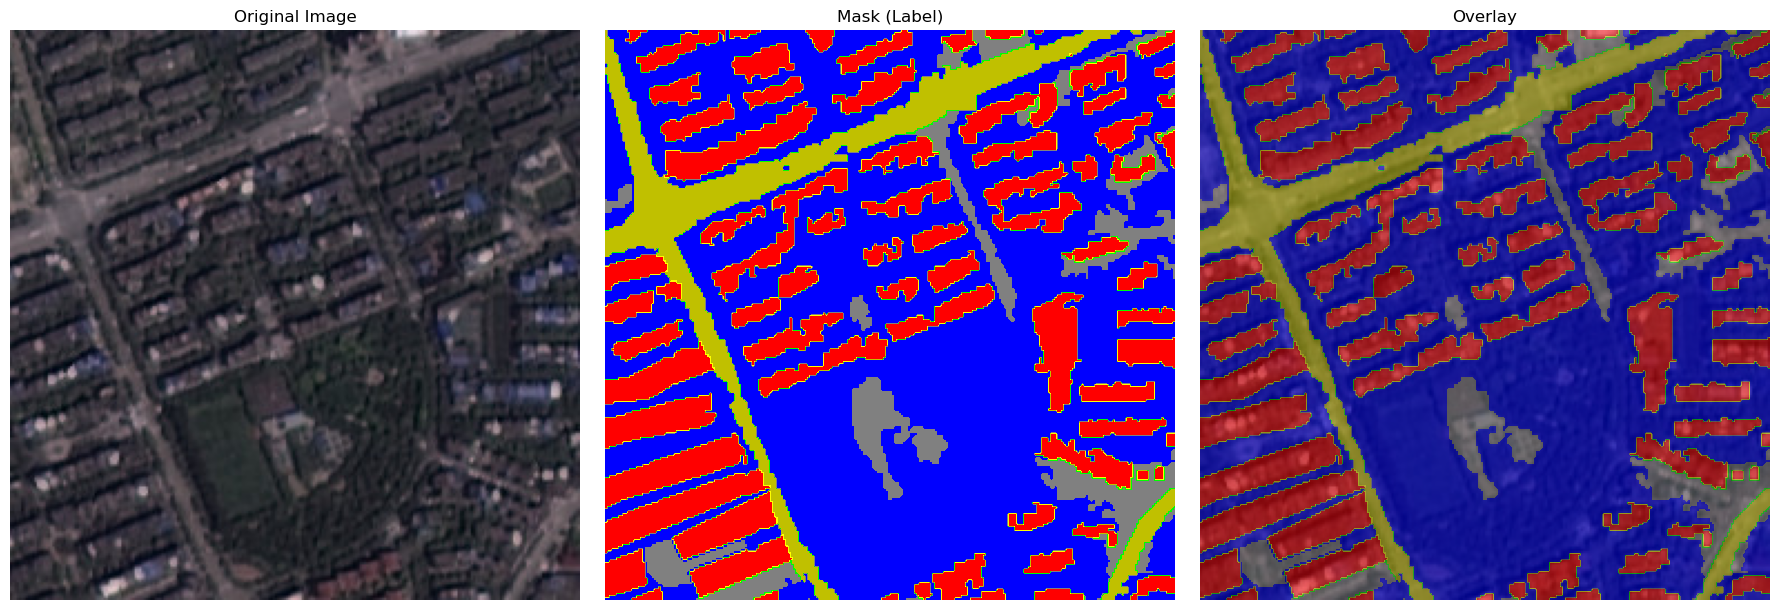

In [15]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 读取原图和RGB Mask图
img_np = io.imread(r"..\WHDLD\Images\wh0247.jpg")
mask_rgb = io.imread(r"..\WHDLD\labels\wh0247.png")

# RGB → Label 映射表
rgb_to_label = {
    (255, 0, 0): 1,  # building
    (255, 255, 0): 2,  # road
    (192, 192, 0): 3,  # pavement
    (0, 255, 0): 4,  # vegetation
    (128, 128, 128): 5,  # bare soil
    (0, 0, 255): 6  # water
}

# 创建 label mask
mask_label = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)
for rgb, label in rgb_to_label.items():
    matches = np.all(mask_rgb == rgb, axis=-1)
    mask_label[matches] = label

# 定义 colormap，对应类别及其 RGB 显示颜色
label_colors = [
    # (0, 0, 0),            # 0 - 背景（background）：黑色（用于未标注区域）
    (255, 0, 0),  # 1 - 建筑物（building）：红色
    (255, 255, 0),  # 2 - 道路（road）：黄色
    (192, 192, 0),  # 3 - 人行道/铺装地（pavement）：黄绿色（偏暗）
    (0, 255, 0),  # 4 - 植被（vegetation）：绿色
    (128, 128, 128),  # 5 - 裸土/泥地（bare soil）：灰色
    (0, 0, 255)  # 6 - 水体（water）：蓝色
]
cmap = ListedColormap(np.array(label_colors) / 255.0)

# 生成透明度通道
alpha = np.where(mask_label > 0, 0.5, 0)

# 可视化
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_label, cmap=cmap)
plt.title("Mask (Label)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_np)
plt.imshow(mask_label, cmap=cmap, alpha=alpha)
plt.title("Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()


In [17]:
import os
import numpy as np
from skimage import io
from tqdm import tqdm

# 输入与输出路径
input_dir = r'../WHDLD/labels'  # 原始RGB mask路径
output_dir = r'../WHDLD/labels_2'  # 映射后的label保存路径
os.makedirs(output_dir, exist_ok=True)

# RGB → Label 映射（映射到 0~5）
rgb_to_label = {
    (255, 0, 0): 0,  # building
    (255, 255, 0): 1,  # road
    (192, 192, 0): 2,  # pavement
    (0, 255, 0): 3,  # vegetation
    (128, 128, 128): 4,  # bare soil
    (0, 0, 255): 5  # water
}

# 遍历所有 .png mask 文件
for fname in tqdm(os.listdir(input_dir)):
    if not fname.endswith('.png'):
        continue
    rgb_mask = io.imread(os.path.join(input_dir, fname))
    label_mask = np.zeros((rgb_mask.shape[0], rgb_mask.shape[1]), dtype=np.uint8)

    for rgb, label in rgb_to_label.items():
        matches = np.all(rgb_mask == rgb, axis=-1)
        label_mask[matches] = label

    # 保存标签掩码
    save_path = os.path.join(output_dir, fname)
    io.imsave(save_path, label_mask)


  0%|          | 0/4940 [00:00<?, ?it/s]C:\Users\Administrator\AppData\Local\Temp\ipykernel_7916\3157834347.py:34: UserWarning: ../WHDLD/labels_2\wh0001.png is a low contrast image
  io.imsave(save_path, label_mask)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7916\3157834347.py:34: UserWarning: ../WHDLD/labels_2\wh0002.png is a low contrast image
  io.imsave(save_path, label_mask)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7916\3157834347.py:34: UserWarning: ../WHDLD/labels_2\wh0003.png is a low contrast image
  io.imsave(save_path, label_mask)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7916\3157834347.py:34: UserWarning: ../WHDLD/labels_2\wh0004.png is a low contrast image
  io.imsave(save_path, label_mask)
  0%|          | 4/4940 [00:00<02:06, 39.16it/s]C:\Users\Administrator\AppData\Local\Temp\ipykernel_7916\3157834347.py:34: UserWarning: ../WHDLD/labels_2\wh0005.png is a low contrast image
  io.imsave(save_path, label_mask)
C:\Users\Administrator\AppData\L

In [23]:
np.unique(io.imread("D:\pythonProject\DeepSeek\ps3\PaddleSeg3\WHDLD\labels_2\wh0373.png"))

array([0, 1, 2, 3], dtype=uint8)

In [26]:
import os
import random

# 设置路径
images_dir = r'../WHDLD/Images'
labels_dir = r'../WHDLD/labels_2'

# 输出路径
train_txt = r'../WHDLD/train.txt'
val_txt = r'../WHDLD/val.txt'

# 获取所有图像文件名（假设是 .jpg）
all_images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
all_images.sort()  # 可选：排序保证稳定性
random.seed(42)
random.shuffle(all_images)

# 划分比例
split_ratio = 0.9
split_idx = int(len(all_images) * split_ratio)
train_images = all_images[:split_idx]
val_images = all_images[split_idx:]

# 写入函数
def write_list(file_path, image_list):
    with open(file_path, 'w') as f:
        for fname in image_list:
            img_path = os.path.join(images_dir, fname)
            label_path = os.path.join(labels_dir, fname.replace('.jpg', '.png'))
            f.write(f"{img_path} {label_path}\n")

# 生成 train.txt 和 val.txt
write_list(train_txt, train_images)
write_list(val_txt, val_images)

print(f"✔ train.txt & val.txt 生成完成，共计 {len(train_images)} 训练图像，{len(val_images)} 验证图像。")


✔ train.txt & val.txt 生成完成，共计 4446 训练图像，494 验证图像。
